Matplotlib is building the font cache; this may take a moment.


First 5 rows of dataset:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (c

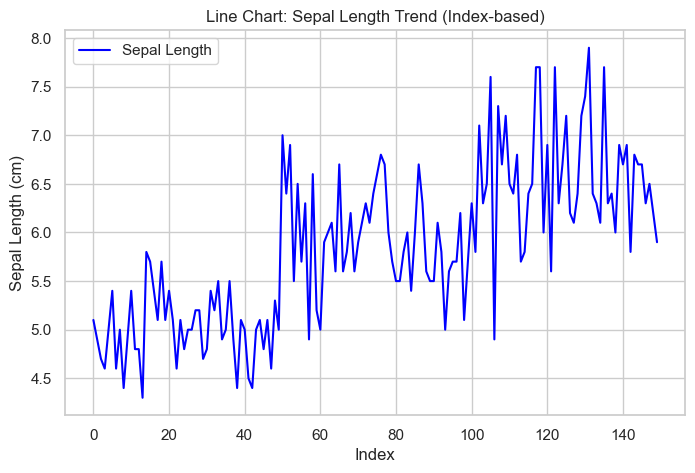

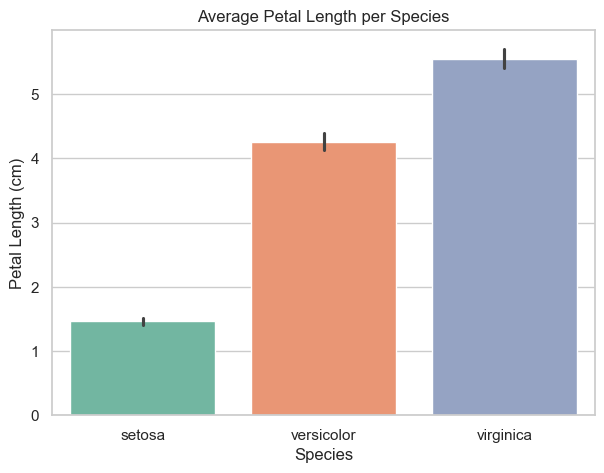

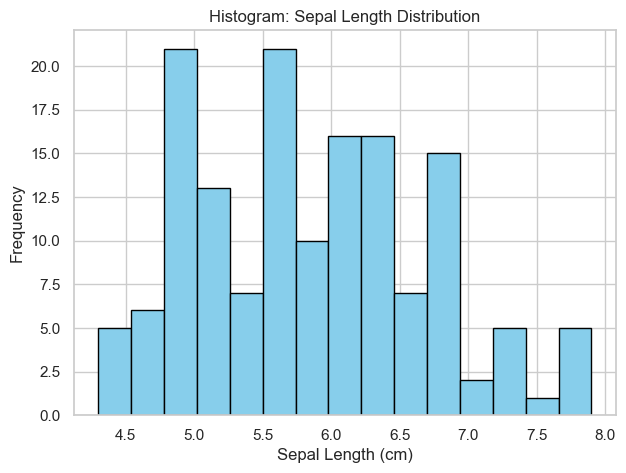

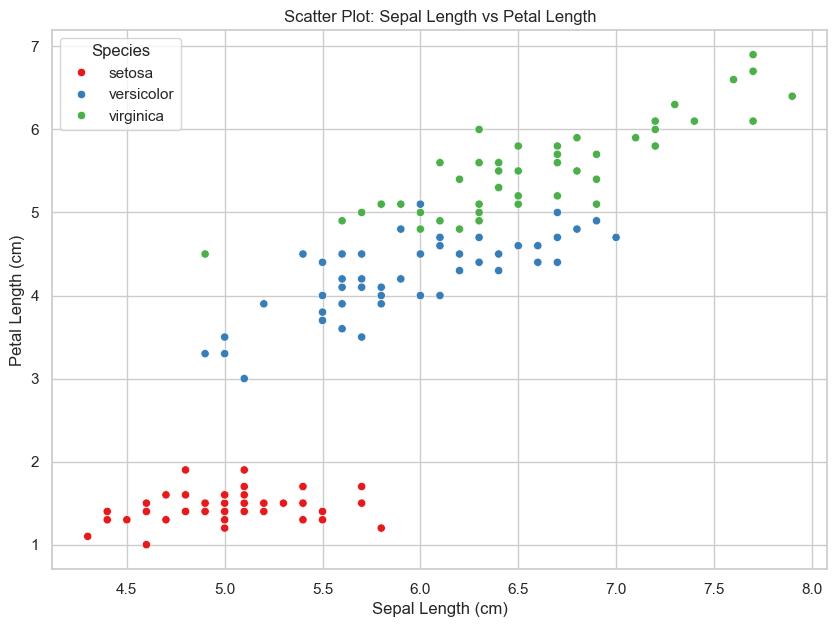

In [9]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


# Task 1: Load and explore the Dataset
try:
    # load dataset (Iris dataset as example)
    iris = load_iris(as_frame=True)
    df = iris.frame
    # Map numeric target (0,1,2) → species names
    df['species'] = df['target'].map({i:name for i, name in enumerate(iris.target_names)})
    
    # Display first few rows
    print("First 5 rows of dataset:\n")
    print(df.head())
    
    # Dataset info 
    print("\nDataset Info:\n")
    df.info() # No need to print(df.info()) as info() prints itself
    
    # Check missing values
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    
    # Clean dataset (Iris has no missing values, but i demonstrate handling)
    df = df.dropna()
except FileNotFoundError:
    print("Error: File not found")
except Exception as e:
    print("An error occured:", e)
    
# Task 2: Basic data analysis
# Basic statistics
print("\nDescriptive statistics:\n")
print(df.describe())

# check columns
print(df.columns)

# Note: The 'species' column is already created in Task 1, this line is redundant
# but harmless if you want to keep it as a safeguard.
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Grouping by Species
species_means = df.groupby('species').mean(numeric_only=True) # Use numeric_only=True to suppress warnings in modern pandas
print("\nMean value by species:\n")
print(species_means)

# Observations
print("\nObservation: Setosa species has much smaller petal length and width compared to the others.")

# Task 3: Data Visualization

sns.set(style='whitegrid') # better style

# 1. Line Chart
# Note: Use plt.figure() not plt.Figure()
plt.figure(figsize=(8, 5))
plt.plot(df.index, df['sepal length (cm)'], label="Sepal Length", color="blue")
plt.title("Line Chart: Sepal Length Trend (Index-based)")
plt.xlabel("Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()

# Bar Chart
plt.figure(figsize=(7, 5))
# For modern seaborn, setting hue is better practice to avoid the FutureWarning
sns.barplot(x="species", y="petal length (cm)", data=df, estimator="mean", palette="Set2", hue="species", legend=False) 
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(df["sepal length (cm)"], bins=15, color="skyblue", edgecolor="black")
plt.title("Histogram: Sepal Length Distribution")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df, palette="Set1")
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.show()